In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class Game:
    def __init__(self):
        self.score = 0
        self.score1 = 0
        self.score2 = 0
        self.strikes = 0
        self.outs = 0
        self.bases = [1,0,0,0]
        self.rules = {'[1, 1]':2, #Double == 2
                      '[1, 2]':1, #Single == 1
                      '[1, 3]':1,
                      '[1, 4]':1,
                      '[1, 5]':5, #Base on error == 5
                      '[1, 6]':5, #Base on balls == 5
                      '[2, 2]':0, #Strike == 0
                      '[2, 3]':0,
                      '[2, 4]':0,
                      '[2, 5]':0,
                      '[2, 6]':-1, #Foulout == -1 (Basically an out)
                      '[3, 3]':-1, #Out at first == -1
                      '[3, 4]':-1,
                      '[3, 5]':-1,
                      '[3, 6]':-1,
                      '[4, 4]':-1, #Flyout == -1 (Basically an out)
                      '[4, 5]':-1,
                      '[4, 6]':-1,
                      '[5, 5]':-2, #Doubleplay == -2 (Basically 2x out)
                      '[5, 6]':3, #Triple == 3
                      '[6, 6]':4 #Homerun == 4
                     } 
    
    def simulate_game(self, n_innings = 9):
        for i in range(0, n_innings):
            self.simulate_inning()
    
    def simulate_inning(self):
        while self.outs < 2:
            self.bat()
        self.score1 += self.score
        self.switch_sides()
        while self.outs < 2:
            self.bat()
        self.score2 += self.score
        
    def switch_sides(self):
        self.score = 0
        self.strikes = 0
        self.outs = 0
        self.bases = [1,0,0,0]
    
    def decide_outcome(self, rolls):
        return self.rules[str(rolls)]
    
    def bat(self):
        self.bases[0] = 1
        rolls = sorted(np.random.randint(1,7,2))
        result = self.decide_outcome(rolls)
        self.update_game(result)
        
    def update_game(self, result):
        if result == 0:
            self.strikes += 1
            if self.strikes == 3:
                self.strikes = 0
                self.outs += 1
        elif result == -1:
            self.outs += 1
        elif result == -2:
            self.outs += 2
        elif result >= 0 and result <= 4:
            for i in reversed(range(len(self.bases))):
                if self.bases[i] == 1:
                    newindex = i + result
                    self.bases[i] = 0
                    if newindex >= 4:
                        self.score += 1
                    else:
                        self.bases[newindex] = 1
        elif result == 5:
            #Check if the next following bases are occupied and update accordingly
            if self.bases[1] == 1:
                if self.bases[2] == 1:
                    if self.bases[3] == 1:
                        self.score += 1
                    self.bases[3] = 1
                self.bases[2] = 1
            self.bases[1] = 1

In [3]:
finalscores = []
for i in range(0,10000):
    game = Game()
    game.simulate_game()
    finalscores.append(game.score1 + game.score2)

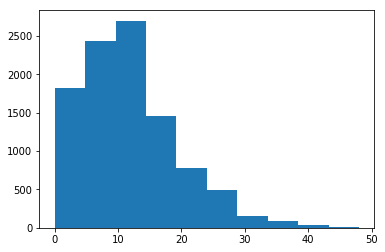

In [4]:
plt.hist(finalscores)
plt.show()

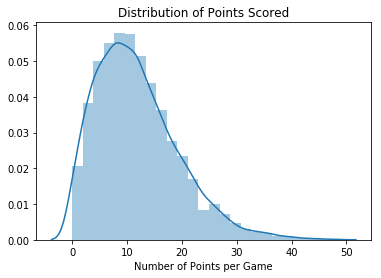

In [10]:
g = sns.distplot(finalscores, bins = 25)
g.set_xlabel("Number of Points per Game")
g.set_title("Distribution of Points Scored")
plt.show()

In [6]:
#Average points per game
np.mean(finalscores)

11.7717

In [8]:
#Median points per game
np.median(finalscores)

10.0